# **1. Perkenalan**
---
Nama: `Evita Ardhiya Ramadhani`

Dataset: `Amazon Kindle Book Review for Sentiment Analysis` dari `Kaggle dataset`
- Dataset ini berupa review buku dari 06 juni 2000 hingga 20 juli 2014 sebanyak 12000 data.

Objective: Membuat DNN, GRU dan LSTM model untuk melakukan sentimen analisis berdasarkan review customer Amazon Kindle Book

# **2. Import Libraries**
---
Definisikan library yang digunakan dalam pembuatan project seperti pandas, matplotplib, tensorflow dan sebagainya.

In [ ]:
# Load dan manipulasi 
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# preprosessing
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

# download nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# modelling
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, GRU, BatchNormalization, Dropout, TextVectorization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

# warning ignore
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# **3. Loading Data**
---
Load dataset yang akan digunakan mengunakan pandas

In [ ]:
# load dataset
data = pd.read_csv('all_kindle_review .csv')
data

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,jena,1393545600
11996,11996,6272,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,Peacekeepers Series,1305504000
11997,11997,12483,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,a little creepy,1374796800
11998,11998,3640,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work,1379376000


Keterangan dataset:

- **asin**           : ID setiap produk
- **helpful**        : Kegunaan review yang diberikan
- **rating**         : Tingkat rating yang diberikan dari nilai 1 - 5
- **reviewText**     : Teks review yang diberikan customer
- **reviewTime**     : Waktu review diberikan
- **reviewerID**     : ID tiap review yang diberikan
- **reviewerName**   : Nama reviewer
- **summary**        : summary dari review
- **unixReviewTime** :cap waktu unix

In [ ]:
# duplicate dataset
data_copy = data.copy()

'''Ini digunakan untuk menyimpan dataset yang asli agar jika sewaktu-waktu dibutuhkan data asli masih tersedia'''

'Ini digunakan untuk menyimpan dataset yang asli agar jika sewaktu-waktu dibutuhkan data asli masih tersedia'

In [ ]:
# head of dataset
data.head(5)

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [ ]:
# check type of column dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      12000 non-null  int64 
 1   Unnamed: 0.1    12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         12000 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


Insight
- Terdapat missing value pada kollom `reviewerName` karena jumlah non-null tidak berjumlah sama dengan baris dataset
- tipe data dari kolom `reviewTime` yang berupa tanggal belum sesuai karena yang harusnya berupa `datetime` hasil diatas masih `object`
- Perlu dilakukannya feature engineering karena tidak semua kolom dibutuhkan dalam pembuatan model

In [ ]:
# convert type `reviewTime` from object to datetime
data['reviewTime'] = data['reviewTime'].astype('datetime64[ns]')

In [ ]:
# check duplicate data
data[data.duplicated()]

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime


- kolom `reviewTime` telah berhasil diubah menjadi tipe datetime
- Tidak terdapat adanya data duplikat pada dataset

# **4. Exploratory Data Analysis (EDA)**
---

## 4.1 Cek Imbalance data pada Target
Judgement:
- Secara keseluruhan rating yang diberikan adalah dari nilai 1 -5 tetapi untuk sentiment analisis yang akan dilakukan hanya akan diklasifikasikan menjadi 2 kelas yaitu `positive` dan `negative`
- Untuk rating 1-3 akan diubah menjadi 0 yang artinya review `negative`
- Untuk rating 4-5 akan diubah menjadi 1 artinya review `positive`

In [ ]:
# check jumlah masing-masing dari rating
data['rating'].value_counts()

5    3000
4    3000
3    2000
2    2000
1    2000
Name: rating, dtype: int64

In [ ]:
# replace rating 
data['rating']=data['rating'].replace([1,2,3],0)
data['rating']=data['rating'].replace([4,5],1)

# check junlah masing-masing dari rating
data['rating'].value_counts()

0    6000
1    6000
Name: rating, dtype: int64

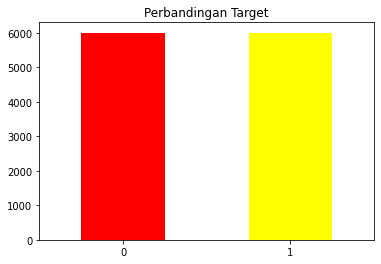

In [ ]:
# visualisasi jumlah target
data['rating'].value_counts().plot(kind='bar', color=['red', 'yellow'])
plt.title('Perbandingan Target')
plt.xticks(rotation=0)
plt.show()

Insight:
- Jumlah data untuk `positive(1)` dan `negative(0)` jumlahnya sama yaitu masing-masing 6000 baris sehingga data target balance
---

## 4.2 Review Terbanyak
melihat pada hari apa yang memiliki review paling banyak?

In [ ]:
# atur index berdasarkan tanggal
sorted_data = data.sort_values(by='reviewTime', ascending=True).groupby('reviewTime').count()
sorted_data.head(5)

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewerID,reviewerName,summary,unixReviewTime
reviewTime,,,,,,,,,,
2000-06-06,1,1,1,1,1,1,1,1,1,1
2001-11-07,1,1,1,1,1,1,1,1,1,1
2002-11-05,1,1,1,1,1,1,1,1,1,1
2005-09-16,1,1,1,1,1,1,1,1,1,1
2005-11-10,1,1,1,1,1,1,1,1,1,1


In [ ]:
# display tanggal terakhir
sorted_data.tail(5)

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewerID,reviewerName,summary,unixReviewTime
reviewTime,,,,,,,,,,
2014-07-15,3,3,3,3,3,3,3,0,3,3
2014-07-16,6,6,6,6,6,6,6,0,6,6
2014-07-17,2,2,2,2,2,2,2,0,2,2
2014-07-19,1,1,1,1,1,1,1,0,1,1
2014-07-20,1,1,1,1,1,1,1,0,1,1


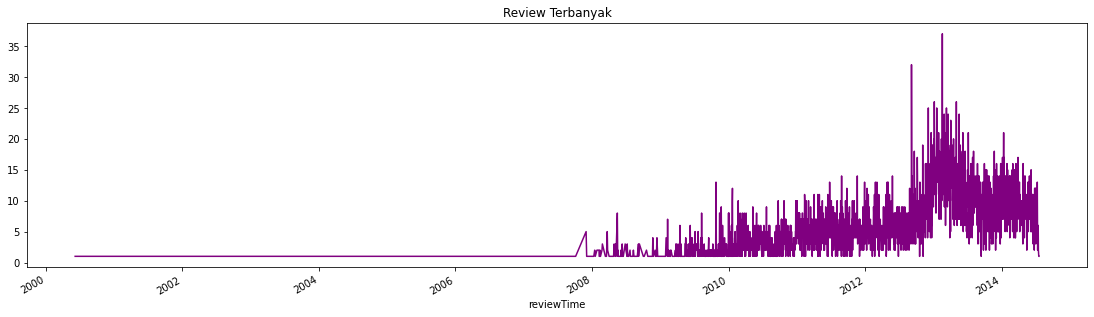

In [ ]:
# visulisasi linechar untuk timeseries dari sorted data
fig, ax = plt.subplots(figsize=(19,5))
plt.title('Review Terbanyak')
sorted_data['reviewerID'].plot(kind='line',ax=ax, color='purple')
plt.show()

In [ ]:
# tampilkan tanggal dengan review terbanyak
sorted_data[(sorted_data['reviewerID'] == sorted_data['reviewerID'].max())]['reviewerID']

reviewTime
2013-02-18    37
Name: reviewerID, dtype: int64

Insight:
- Berdasarkan linechart diatas jumlah review yang ada dari tahun 2000 hingga 2007 tidak mengalai peningkatan atau masih konstan.  
- Jumlah review yang diberikan customer semakin meningkat dari tahun 2008 hinnga 2013 dan mengalami sedikit penurunan pada tahun 2014.
- Pada Tanggal 18 Februari 2013 pada hari tersebut jumlah review terbanyak yang diberikan customer sebanyak `37 review`
---

## 4.3 Kata Yang sering muncul pada `All Review`, `Positive`, dan `Negative`

In [ ]:
# Definisikan `all review`, `positive`, dan `negative` dalam bentuk list
all = ' '.join (list(data['reviewText'].values)) # semua review
positive = ' '.join (list(data[data['rating'] == 1]['reviewText'].values)) # positive review
negative = ' '.join (list(data[data['rating'] == 0]['reviewText'].values)) # negative review

In [ ]:
# Definisikan wordcloud untuk melihat kata yang sering muncul pada review
word_cloud = WordCloud(
    background_color='black', #background gambar
    max_words=5000, #jumlah maksimal kata
    colormap='Pastel1', #warna dari kata 
    random_state= 17, #konsistensi random sample
    stopwords=set(stopwords.words('english')) #bahasa yang digunakan dalam stopwords
    )

In [ ]:
# Defisikan fungsi untuk membuat grafik Wordcloud
def wc_visualisasi(text, title):
    plt.figure(figsize=(15,7)) 
    plt.imshow(word_cloud.generate(text), interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{title}', fontsize=23)
    plt.show()

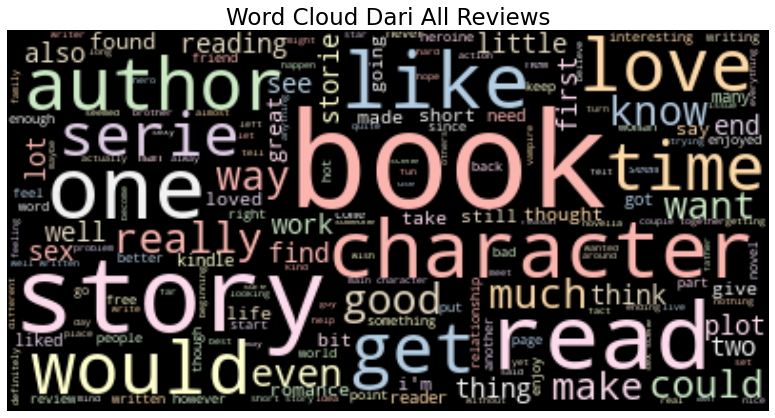

In [ ]:
# visualisasi wordcloud untuk `all review`
all_lower = all.lower() #membuat semua kata menjadi huruf kecil
wc_visualisasi(all_lower, 'Word Cloud Dari All Reviews')

Insight:
- Berdasarkan visulisasi dari word cloud untuk `All review` dapat dilihat bahwa kata yang sering digunakan dalam memberikan review adalah `book`, `story`, `read`. Hal ini disebabkan karena dataset yang digunakan merupakan review dari `Buku atau Book` sehingga kata yang telah disebutkan merupakan hal yang berhubungan dengan buku. Seperti buku apa yang telah dibaca, story atau cerita dari buku tersebut serta setelah membaca buku tersebut hal apa yang telah dirasakan dan didapatkan.
- Selain 3 kata teratas tersebut kata `character` dan `author` juga dapat terlihat sering digunakan, hal ini manandakan bahwa selain story atau cerita dari buku tersebut banyak juga yang memberikan review bersadarakan author ataupun character dari cerita didalam buku tersebut.

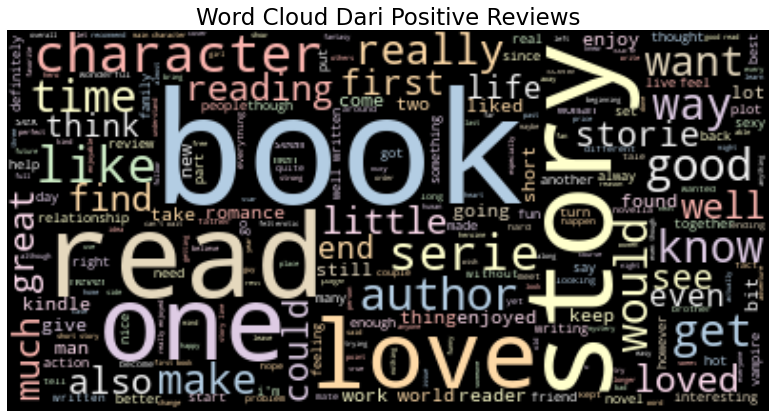

In [ ]:
# visualisasi wordcloud untuk `positive review`
positive_lower = positive.lower() #membuat semua kata menjadi huruf kecil
wc_visualisasi(positive_lower,'Word Cloud Dari Positive Reviews')

Insight:
- Dari `Positive Reviews` kata yang sering muncul sama dengan all reviews yaitu `book`, `story`, `read`, tetapi yang membedakan adalah adanya kata `love`dan `like`yang menandakan bahwa buku yang telah dibaca memiliki kesan yang positif karena cutomer menyukai buku tersebut. Kata `story` juga sering disebutkan dlam review, hal ini menandakan kemungkinan banyak menyukai buku tersebut dari ceritanya.

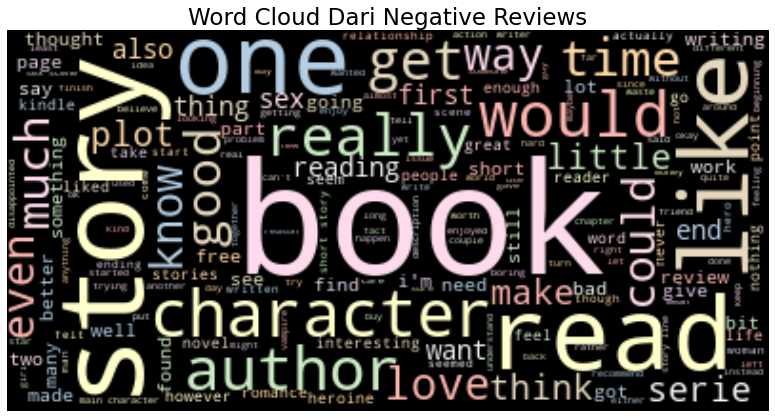

In [ ]:
# visualisasi wordcloud untuk `negative review`
negative_lower = negative.lower() #membuat semua kata menjadi huruf kecil
wc_visualisasi(negative_lower,'Word Cloud Dari Negative Reviews')

Insight:
- Dari `Negative Reviews` Kata yang sering muncul sama halnya dengan all reviews dan positif reviews, tetapi selain kata `book`, `story`, `read` terdapat kata `better` dan `bad` walaupun tidak terlalu sering disebutkan tetapi hal tersebut bisa menunjukkan bahwa buku tersebut masih bisa lebih baik lagi dan `bad` menandakan buku tersebut kurang disukai customer. 
- Kata `little` dan `think` juga sering disebut seperti contoh kalimat `i think this book better if .....` atau `I think this story is a little less good....` artinya walaupun tidak menyukai buku tersebut tetapi customer tetap memilih kata yang cukup sopan dalam memberika review.

# **5. Data Preprosessing**
---

## 5.1 Feature Engineering

Feature engineering bertujuan untuk memilih kolom atau fitur yang akan digunakan dalam pembuatan model.

In [ ]:
# dsiplay dataset
data.head(3)

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",0,"Jace Rankin may be short, but he's nothing to ...",2010-09-02,A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",1,Great short read. I didn't want to put it dow...,2013-10-08,A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",0,I'll start by saying this is the first of four...,2014-04-11,A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400


- Untuk melakukan sentiment analisis fitur yang dibutuhkan adalah `reviewText` dan target adalah `rating`
- Untuk fitur hanya kolom `reviewText` karena kita hanya akan melakukan sentimen berdasarkan review yang diberikan customer 
- untuk kolom  `rating` digunakan untuk target atau label yang akan dipelajari oleh model dalam melakukan klasifikasi review yang termasuk positif atau negatif
- Selain kedua kolom tersbut, maka kolom yang lain akan di drop karena tidak dibutuhkan dalam membuat model

In [ ]:
# drop fitur
data.drop(
        {'Unnamed: 0.1', 'Unnamed: 0', 'asin', 'helpful', 'reviewTime', 'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'},
        axis=1, inplace=True)

In [ ]:
# display dataset setelah didrop
data.head(3)

,rating,reviewText
0,0,"Jace Rankin may be short, but he's nothing to ..."
1,1,Great short read. I didn't want to put it dow...
2,0,I'll start by saying this is the first of four...


---

## 5.2 Split data Inference
Data inference digunakan sebagai `data baru` untuk menguj model yang telah dibuat apakah model tersebut dapat melakukan prediksi dan  memproses data yang tidak terdapat pada data train dan test. Diambil 10 data random dari dataset dengan random state 17.

In [ ]:
# split 10 data inference
data_inf = data.sample(10, random_state=17)

# drop data inference dari dataset
data_train_test = data.drop(data_inf.index)

# reser index masing-masing data
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

- Hal yang dilakukan pertama adalah mengambil data random sebagai data inference dari dataset awal
- Menghapus data inference dari dataset agar tidak terjadi data leak
- Mengatur kembali index dari data inference dan data train test yang sebelumnya berntakan akibat pengambilan data inefernce secara random

In [ ]:
# display data inference
data_inf

,rating,reviewText
0,0,Because I liked the way the story started I ho...
1,0,It was very fast paced with no depth. It made ...
2,1,"Yes, much of this story (as with others in the..."
3,0,I have to admit right off the bat that I delet...
4,0,I was drawn to this because of the title and t...
5,0,I downloaded the book because I couldn't belie...
6,0,I think it is good book for the series' storyl...
7,0,Very disappointed with this book as I thought ...
8,0,The cover is very good. The tabs to lock it in...
9,1,A great short that sticks with you. It was re...


---

## 5.3 Data Cleaning
Pada data cleaning dilakukan cek dan handling missing value, sebelumnya pada data.info telah dilakukan cek non-null dan pada kolom `rating` dan `reviewText` tida terdapat missing value. Tetapi dilakukan kembali untuk memastikan tida adanya missing value agar pada saat dataset diproses tida tejadi error.

In [ ]:
# cek missing value
data_train_test.isnull().sum()

rating        0
reviewText    0
dtype: int64

Insight:
- Setelah dilakukan pengecekan missing value ulang menggunakan .isnull() dataset tidak memiliki missing value
- data train test telah bisa digunakan untuk preprosesing selanjutnya yaitu case folding
---

## 5.4 Case Folding

**1. Melakukan preprosessing kata yang terdapat pada kalimat review. Disini penulis mengambil index 23 sebagai sample yang digunakan untuk dilakukan preposessing.**

In [ ]:
# Sample teks review
print('Review sample:')
print(data_train_test['reviewText'][23])

Review sample:
What's the difference between a guy and a man?  Willingness to take a risk on a relationship with a woman.  Of course, he's hot, she's hot, and the physical attraction is explosive and enjoyable.  That will earn 3 stars in this genre.  What earned the 4th star is the quality of the characterization and the interaction between the various characters in the book.The book is a quick, short read.  Just the right palate pleaser when you want a bit of romance and sex, but don't want to commit.


**2. Konversi semua text menjadi huruf kecil (lower) karena dalam hal ini model masuk dalam case sensitive**

In [ ]:
# konversi ke lower
sample = data_train_test['reviewText'][23]
sample_lower = sample.lower()
print('Review sample:\n', sample_lower)

Review sample:
 what's the difference between a guy and a man?  willingness to take a risk on a relationship with a woman.  of course, he's hot, she's hot, and the physical attraction is explosive and enjoyable.  that will earn 3 stars in this genre.  what earned the 4th star is the quality of the characterization and the interaction between the various characters in the book.the book is a quick, short read.  just the right palate pleaser when you want a bit of romance and sex, but don't want to commit.


Dapat dilihat bahwa semua kata dalam teks telah berubah menjadi huruf kecil semua

**3. Menghilangkan tanda baca pada teks**

In [ ]:
# hapus tanda baca
sample_punc = sample_lower.translate(str.maketrans("","",string.punctuation))
print('Review sample:\n', sample_punc)

Review sample:
 whats the difference between a guy and a man  willingness to take a risk on a relationship with a woman  of course hes hot shes hot and the physical attraction is explosive and enjoyable  that will earn 3 stars in this genre  what earned the 4th star is the quality of the characterization and the interaction between the various characters in the bookthe book is a quick short read  just the right palate pleaser when you want a bit of romance and sex but dont want to commit


Tanda baca seperti titik (.), petik atas('), koma(,) dan tanda tanya (?) telah berhasil dihilangkan dari teks review dan diganti menjadi spasi.

**4. Menghilangkan yang bukan huruf**

In [ ]:
# Menghilangkan yang bukan huruf
sample_punc = re.sub("[^A-Za-z\s']"," ", sample_punc) 
print('Review sample:\n', sample_punc)

Review sample:
 whats the difference between a guy and a man  willingness to take a risk on a relationship with a woman  of course hes hot shes hot and the physical attraction is explosive and enjoyable  that will earn   stars in this genre  what earned the  th star is the quality of the characterization and the interaction between the various characters in the bookthe book is a quick short read  just the right palate pleaser when you want a bit of romance and sex but dont want to commit


Dapat dilihat bahwa kata yang mengandung selain huruf seperti angka dihapus. Pada baris kedua terdapat angka `3` dan `4th` setelah dilakukan penghapusan yang selain huruf maka yang tersisa hanya spasi saja.

**5. Menghilangkan `tab` pada teks**

In [ ]:
#  menghapus tab
sample_punc = sample_punc.strip()
print('Review sample:\n', sample_punc)

Review sample:
 whats the difference between a guy and a man  willingness to take a risk on a relationship with a woman  of course hes hot shes hot and the physical attraction is explosive and enjoyable  that will earn   stars in this genre  what earned the  th star is the quality of the characterization and the interaction between the various characters in the bookthe book is a quick short read  just the right palate pleaser when you want a bit of romance and sex but dont want to commit


**6. Tokenizing dan menghilangkan `stopwords` atau katanya yang tidak memiliki arti dalam teks**

In [ ]:
# definisikan stopword dalam hal ini menggunakan english
stopwords = list(set(stopwords.words('english')))

# mengubah teks menjadi bentuk token
tokens = word_tokenize(sample_punc)

# Remove Stopwords
sample_stopwords = ' '.join([word for word in tokens if word not in stopwords])
sample_stopwords

'whats difference guy man willingness take risk relationship woman course hes hot shes hot physical attraction explosive enjoyable earn stars genre earned th star quality characterization interaction various characters bookthe book quick short read right palate pleaser want bit romance sex dont want commit'

- Dalam preprosessing ini suatu dokumen (teks yang diproses) akan dipisahkan menjadi kata kata yang disebut dengan token. Karena model membaca vektor sehingga dalam suatu dokumen harus dipisahkan menjadi token.
- Selanjutnya, menghilangkan kata yang tidak memiliki arti seperti `a`, `on`, `to` dan sebagainya. Dapat dilihat banyak kata yang tidak memiliki arti dihilangkan karena dianggap tidak memiliki arti dalm proses pembuatan model.

**7. Lemmatization**

In [ ]:
# Definisikan lemmatizer
word_lemmatizer = WordNetLemmatizer()

# terapkan Lemmatizing pada sample teks
sample_lemmatizer = word_lemmatizer.lemmatize(sample_stopwords)
sample_lemmatizer

'whats difference guy man willingness take risk relationship woman course hes hot shes hot physical attraction explosive enjoyable earn stars genre earned th star quality characterization interaction various characters bookthe book quick short read right palate pleaser want bit romance sex dont want commit'

- Dalam proses lemmatization, kata diubah menjadi kata dasar dari kata tersebut sesuai yang ada didalam dictionary.
- Dalam sample review diatas masih banyak kata yang tidak berubah menjadi kata dasarnya, hal ini diakibatkan karena kemungkinan kata tersebut tidak ada didalam dictionary yang digunakan

**8. Menerapkan semua preprosessing diatas ke dataset (corpus)**

In [ ]:
# fungsi untuk preprosessing dataset
def corpus_preprosessing(corpus):
    # konversi ke huruf kecil (lower)
    corpus = corpus.lower()

    # menghilangkan tanda baca
    corpus = corpus.translate(str.maketrans("","",string.punctuation))

    # menghilangkan yang bukan huruf
    corpus = re.sub("[^A-Za-z\s']"," ", corpus) 

    # menghilangkan tab
    corpus = corpus.strip()

    # mengubah teks menjadi bentuk token
    tokens = word_tokenize(corpus)

    # Remove Stopwords
    corpus = ' '.join([word for word in tokens if word not in stopwords])
    
    # lemmatizing
    corpus = word_lemmatizer.lemmatize(corpus)

    return corpus

In [ ]:
# terapkan dalam data train test
data_train_test['review_process'] = data_train_test['reviewText'].apply(lambda x: corpus_preprosessing(x))
data_train_test

,rating,reviewText,review_process
0,0,"Jace Rankin may be short, but he's nothing to ...",jace rankin may short hes nothing mess man hau...
1,1,Great short read. I didn't want to put it dow...,great short read didnt want put read one sitti...
2,0,I'll start by saying this is the first of four...,ill start saying first four books wasnt expect...
3,0,Aggie is Angela Lansbury who carries pocketboo...,aggie angela lansbury carries pocketbooks inst...
4,1,I did not expect this type of book to be in li...,expect type book library pleased find price right
...,...,...,...
11985,1,Valentine cupid is a vampire- Jena and Ian ano...,valentine cupid vampire jena ian another vampi...
11986,1,I have read all seven books in this series. Ap...,read seven books series apocalypticadventure o...
11987,0,This book really just wasn't my cuppa. The si...,book really wasnt cuppa situation man capturin...
11988,0,"tried to use it to charge my kindle, it didn't...",tried use charge kindle didnt even register ch...


In [ ]:
# Menghitung vocab tiap dokumen dan seluruh data train test
vocab_count = []

for index in range(len(data_train_test)):
    vocab_count.append(len(word_tokenize(data_train_test['review_process'][index])))

data_train_test['vocab_count'] = vocab_count
data_train_test

,rating,reviewText,review_process,vocab_count
0,0,"Jace Rankin may be short, but he's nothing to ...",jace rankin may short hes nothing mess man hau...,280
1,1,Great short read. I didn't want to put it dow...,great short read didnt want put read one sitti...,38
2,0,I'll start by saying this is the first of four...,ill start saying first four books wasnt expect...,43
3,0,Aggie is Angela Lansbury who carries pocketboo...,aggie angela lansbury carries pocketbooks inst...,30
4,1,I did not expect this type of book to be in li...,expect type book library pleased find price right,8
...,...,...,...,...
11985,1,Valentine cupid is a vampire- Jena and Ian ano...,valentine cupid vampire jena ian another vampi...,19
11986,1,I have read all seven books in this series. Ap...,read seven books series apocalypticadventure o...,53
11987,0,This book really just wasn't my cuppa. The si...,book really wasnt cuppa situation man capturin...,32
11988,0,"tried to use it to charge my kindle, it didn't...",tried use charge kindle didnt even register ch...,14


In [ ]:
# jumlah maksimal dan minimal vocab dalam data train test
print('Jumlah maksimal Vocab:', data_train_test.vocab_count.max())
print('Jumlah mininimal Vocab:', data_train_test.vocab_count.min())

Jumlah maksimal Vocab: 1126
Jumlah mininimal Vocab: 1


Dari data train test jumlah kata (vocab) terbanyak adalah `1126` dan yang paling sedikit adalah `1`.

---

## 5.5 Split data Train, test and Validation

**1. Split Fitur dan Target**

Definisikan kolom yang termasuk fitur (X) dan target atau label (y) yang akan dimasukkan dalam permodelan

In [ ]:
# definisikan fitur X
X = data_train_test['review_process']
# definisikan label y
y = data_train_test['rating']

**2. Split data train, test dan validation**

- Data train digunakan untuk pembelajaran selama training data dilakukan
- Data test digunakan untuk mengevaluasi hasil dari model
- Data validation digunakan untuk menvalidasi nilai yang diperoleh selama training, apakah hasilnya masih berada dalam rentang yang divalidasi

In [ ]:
# split data train dan test dengan test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# split data train dan data val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=17)

# tampilkan shape masing-masing data
print('Size dataset     :', data_train_test.shape)
print('Size X-Train     :', X_train.shape)
print('Size X-val       :', X_val.shape)
print('Size X-Test      :', X_test.shape)

Size dataset     : (11990, 4)
Size X-Train     : (7673,)
Size X-val       : (1919,)
Size X-Test      : (2398,)


Data train test pertama dipisahkan menjadi data train (80%) dan test (20%). Setelahnya data validation (10%) diambil dari data train.

---

## 5.6 Vectorization

In [ ]:
# definisikan vectorize
Vectorize = CountVectorizer()
# terapkan pada X_train
Vectorize.fit(X_train)
vocab_count = len(Vectorize.vocabulary_.keys())
max_document_len = max([len(i.split(" ")) for i in X_train])

In [ ]:
# konvert input menjadi vector
vectorization = TextVectorization(max_tokens = vocab_count,
                                        standardize="lower_and_strip_punctuation",
                                        split="whitespace",
                                        ngrams=None,
                                        output_mode="int",
                                        output_sequence_length = max_document_len,
                                        input_shape=(1,))

# training ke X_train
vectorization.adapt(X_train)

---

## 5.6 Embendding

In [ ]:
# Embedding layer
embedding = Embedding(input_dim=vocab_count,
                      output_dim=17,
                      embeddings_initializer="uniform",
                      input_length=max_document_len
                      )

# **6. Model Building**
---

In [ ]:
# membuat input pipeline dengan batch 128
train_final = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
test_final = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
val_final = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(batch_size=64).prefetch(tf.data.AUTOTUNE)

## 6.1 DNN Model

In [ ]:
# delete backend session
tf.keras.backend.clear_session()

# definisikan model
model = Sequential()
# vectorization layer
model.add(vectorization)
# embemdding layer
model.add(embedding)
# hidden layer
model.add(GlobalAveragePooling1D())
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh', kernel_initializer='glorot_uniform', kernel_regularizer='l1', bias_initializer='zeros'))
model.add(Dropout(rate=0.3))
# output layer
model.add(Dense(1, activation='sigmoid'))

# model compile
model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.Adamax(clipvalue=0.1), 
                  metrics='accuracy')

# training model
model_history = model.fit(train_final,
                                  epochs=10,
                                  validation_data=(val_final),
                                  verbose=1,
                                  callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3))

Epoch 1/10
120/120 [==============================] - 2s 9ms/step - loss: 1.1016 - accuracy: 0.7751 - val_loss: 1.0147 - val_accuracy: 0.7024
Epoch 2/10
120/120 [==============================] - 1s 7ms/step - loss: 0.8815 - accuracy: 0.8072 - val_loss: 0.8527 - val_accuracy: 0.7733
Epoch 3/10
120/120 [==============================] - 1s 7ms/step - loss: 0.7393 - accuracy: 0.8095 - val_loss: 0.7557 - val_accuracy: 0.7566
Epoch 4/10
120/120 [==============================] - 1s 7ms/step - loss: 0.6607 - accuracy: 0.8123 - val_loss: 0.7085 - val_accuracy: 0.7514
Epoch 5/10
120/120 [==============================] - 1s 7ms/step - loss: 0.6240 - accuracy: 0.8147 - val_loss: 0.6675 - val_accuracy: 0.7931
Epoch 6/10
120/120 [==============================] - 1s 7ms/step - loss: 0.5995 - accuracy: 0.8143 - val_loss: 0.6263 - val_accuracy: 0.7827
Epoch 7/10
120/120 [==============================] - 1s 7ms/step - loss: 0.5751 - accuracy: 0.8160 - val_loss: 0.5900 - val_accuracy: 0.7989
Epoch 

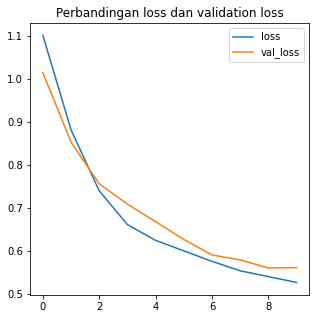

In [ ]:
# ubah ke dataframe
metrics_model= pd.DataFrame(model_history.history)

# plot loss dan validation loss
metrics_model[['loss', 'val_loss']].plot(figsize=(5,5))
plt.title('Perbandingan loss dan validation loss')
plt.show()

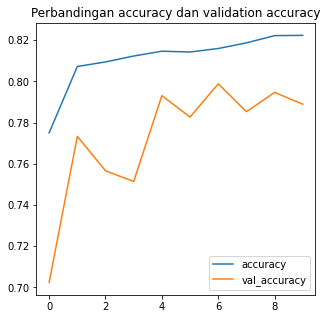

In [ ]:
# plot accuracy dan val_accuracy
metrics_model[['accuracy', 'val_accuracy']].plot(figsize=(5,5))
plt.title('Perbandingan accuracy dan validation accuracy')
plt.show()

In [ ]:
# x_test predict
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1264
           1       0.83      0.69      0.75      1134

    accuracy                           0.79      2398
   macro avg       0.80      0.78      0.78      2398
weighted avg       0.79      0.79      0.79      2398



Insight:
- Dari model DNN ini dari `grafik loss` dapat dilihat bahwa data train dan validation memiliki nilai loss yang semakin turun dan tidak terjadi overfit. Dapat dikatakan model stabil.
- Dari `grafik akurasi` untuk data train akurasinya makin kama semakin meningkat, tetapi untuk data validation masih mengalami exploiding gradient.
- Model hanya memiliki akurasi cukup baik yaitu 79%.
- Dari segi waktu, model cukup cepat melakukan training hanya sekitar `1-2 detik ` per epoch dengan menggunakan runtime GPU.
- Metrics evaluasi model yang digunakan adalah `akurasi` karena penulis ingin melihat seberapa tepat model dalam melakukan klasifikasi secara benar dan dataset yang digunakan memiliki jumlah target yang balance.
---

## 6.2 GRU Model

In [ ]:
# delete backend session
tf.keras.backend.clear_session()

# definisikan model
model_gru = Sequential()
# vectorization layer
model_gru.add(vectorization)
# embemdding layer
model_gru.add(embedding)
# hidden layer
model_gru.add(BatchNormalization())
model_gru.add(GRU(16, activation='tanh', kernel_initializer='glorot_uniform', kernel_regularizer='l1', bias_initializer='zeros'))
model_gru.add(Dropout(rate=0.2))
# output layer
model_gru.add(Dense(1, activation='sigmoid'))

# model compile
model_gru.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.Adamax(clipvalue=0.1), 
                  metrics='accuracy')

# training model
model_gru_history = model_gru.fit(train_final,
                                  epochs=10,
                                  validation_data=(val_final),
                                  verbose=1,
                                  callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3))

Epoch 1/10
120/120 [==============================] - 13s 54ms/step - loss: 1.5296 - accuracy: 0.5020 - val_loss: 1.1741 - val_accuracy: 0.5060
Epoch 2/10
120/120 [==============================] - 5s 39ms/step - loss: 0.9485 - accuracy: 0.5010 - val_loss: 0.7829 - val_accuracy: 0.5060
Epoch 3/10
120/120 [==============================] - 5s 39ms/step - loss: 0.7250 - accuracy: 0.5072 - val_loss: 0.7012 - val_accuracy: 0.5060
Epoch 4/10
120/120 [==============================] - 5s 39ms/step - loss: 0.6972 - accuracy: 0.5059 - val_loss: 0.6947 - val_accuracy: 0.5060
Epoch 5/10
120/120 [==============================] - 5s 39ms/step - loss: 0.6943 - accuracy: 0.5075 - val_loss: 0.6940 - val_accuracy: 0.5060
Epoch 6/10
120/120 [==============================] - 5s 39ms/step - loss: 0.6941 - accuracy: 0.5066 - val_loss: 0.6940 - val_accuracy: 0.5060
Epoch 7/10
120/120 [==============================] - 5s 39ms/step - loss: 0.6941 - accuracy: 0.5062 - val_loss: 0.6940 - val_accuracy: 0.506

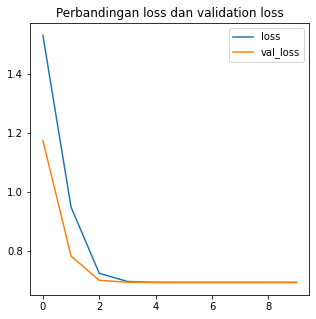

In [ ]:
# ubah ke dataframe
metrics_model_gru = pd.DataFrame(model_gru_history.history)

# plot loss dan validation loss
metrics_model_gru[['loss', 'val_loss']].plot(figsize=(5,5))
plt.title('Perbandingan loss dan validation loss')
plt.show()

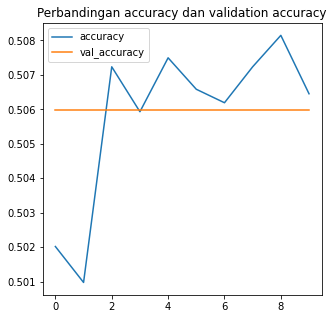

In [ ]:
# plot accuracy dan val_accuracy
metrics_model_gru[['accuracy', 'val_accuracy']].plot(figsize=(5,5))
plt.title('Perbandingan accuracy dan validation accuracy')
plt.show()

In [ ]:
# x_test predict
y_pred = model_gru.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1264
           1       0.47      1.00      0.64      1134

    accuracy                           0.47      2398
   macro avg       0.24      0.50      0.32      2398
weighted avg       0.22      0.47      0.30      2398



Insight:
- Untuk GRU model dapat dilihat dari `grafik loss` model tidak mengalami overfit, tetapi pada data validation masih terjadi  vanishing gradient dari epoch 5-10.
- dari `grafik akurasi` data validation mengalami vashing gradient dari awal hingga akhir epoch dan untuk data train mengalami exploiding gradiet
- Akurasi yang diperoleh masih kurang baik karena model hanya memiliki akurasi 47% dan tidak dapat melakukan klasifikasi sama sekali untuk label `0 (negative)` 
- Dari segi waktu, training memerlukan waktu `13-5 detik` per epoch menggunakan runtime GPU
- Masih diperlukannya ekplorasi untuk membuat model GRU agar cocok untuk dataset ini.


---

## 6.3 LSTM Model

In [ ]:
# delete backend session
tf.keras.backend.clear_session()

# definisikan model
model_lstm = Sequential()
# vectorization layer
model_lstm.add(vectorization)
# embemdding layer
model_lstm.add(embedding)
# hidden layer
model_lstm.add(BatchNormalization())
model_lstm.add(LSTM(16, activation='tanh', kernel_initializer='glorot_uniform', kernel_regularizer='l1', bias_initializer='zeros'))
model_lstm.add(Dropout(rate=0.2))
# output layer
model_lstm.add(Dense(1, activation='sigmoid'))

# model compile
model_lstm.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.Adamax(clipvalue=0.1), 
                  metrics='accuracy')

# training model
model_lstm_history = model_lstm.fit(train_final,
                                  epochs=10,
                                  validation_data=(val_final),
                                  verbose=1,
                                  callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3))

Epoch 1/10
120/120 [==============================] - 9s 48ms/step - loss: 1.6084 - accuracy: 0.4965 - val_loss: 1.1634 - val_accuracy: 0.5060
Epoch 2/10
120/120 [==============================] - 5s 40ms/step - loss: 0.9001 - accuracy: 0.5070 - val_loss: 0.7243 - val_accuracy: 0.5060
Epoch 3/10
120/120 [==============================] - 5s 40ms/step - loss: 0.7000 - accuracy: 0.5074 - val_loss: 0.6945 - val_accuracy: 0.5060
Epoch 4/10
120/120 [==============================] - 5s 40ms/step - loss: 0.6944 - accuracy: 0.5074 - val_loss: 0.6944 - val_accuracy: 0.5060
Epoch 5/10
120/120 [==============================] - 5s 39ms/step - loss: 0.6944 - accuracy: 0.5074 - val_loss: 0.6944 - val_accuracy: 0.5060
Epoch 6/10
120/120 [==============================] - 5s 39ms/step - loss: 0.6944 - accuracy: 0.5074 - val_loss: 0.6944 - val_accuracy: 0.5060
Epoch 7/10
120/120 [==============================] - 5s 39ms/step - loss: 0.6944 - accuracy: 0.5075 - val_loss: 0.6944 - val_accuracy: 0.5060

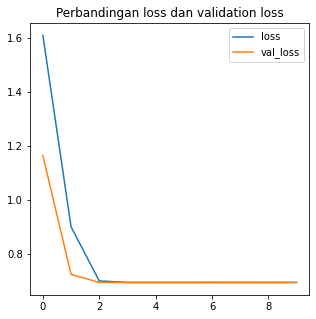

In [ ]:
# ubah ke dataframe
metrics_model_lstm = pd.DataFrame(model_lstm_history.history)

# plot loss dan validation loss
metrics_model_lstm[['loss', 'val_loss']].plot(figsize=(5,5))
plt.title('Perbandingan loss dan validation loss')
plt.show()

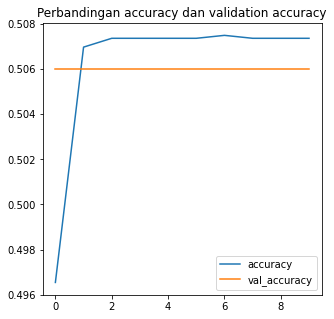

In [ ]:
# plot accuracy dan val_accuracy
metrics_model_lstm[['accuracy', 'val_accuracy']].plot(figsize=(5,5))
plt.title('Perbandingan accuracy dan validation accuracy')
plt.show()

In [ ]:
# x_test predict
y_pred = model_lstm.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1264
           1       0.47      1.00      0.64      1134

    accuracy                           0.47      2398
   macro avg       0.24      0.50      0.32      2398
weighted avg       0.22      0.47      0.30      2398



insight:
- Dari model LSTM, dapat dilihat `grafik loss` juga tidak mengalami overfit sama seperti model lainnya, tetapi untuk mulai dari epoch 4-10 mengalmi vanishing gradient.
- Dari `grafik akurasi` hasil dari data validation mengalami vanishing gradiet dari awal hingga akhir.
- Akurasi hanya sebesar 47% dan tidak dapat melakukan klasifikasi pada label `0 (negative)` seperti halnya model GRU
- Waktu training yang dibutuhkan model yaitu `5-9 detik` per epoch dengan runtime GPU
- Masih dibutuhkan ekplorasi lebih untuk meningkatkan akurasi dari model LSTM untuk digunakan pada dataset ini.
---

# **7. Model Inference**
Menggunakan model terbaik yaitu DNN model untuk digunakan pada data inference atau data yang dianggap baru.

In [ ]:
# display data inference
data_inf

,rating,reviewText
0,0,Because I liked the way the story started I ho...
1,0,It was very fast paced with no depth. It made ...
2,1,"Yes, much of this story (as with others in the..."
3,0,I have to admit right off the bat that I delet...
4,0,I was drawn to this because of the title and t...
5,0,I downloaded the book because I couldn't belie...
6,0,I think it is good book for the series' storyl...
7,0,Very disappointed with this book as I thought ...
8,0,The cover is very good. The tabs to lock it in...
9,1,A great short that sticks with you. It was re...


In [ ]:
# lakukan preprosessing pada data inference
data_inf['review_process'] = data_inf['reviewText'].apply(lambda x: corpus_preprosessing(x))
data_inf

,rating,reviewText,review_process
0,0,Because I liked the way the story started I ho...,liked way story started hope book one teaser s...
1,0,It was very fast paced with no depth. It made ...,fast paced depth made dislike hero beginning w...
2,1,"Yes, much of this story (as with others in the...",yes much story others hot zone series superfic...
3,0,I have to admit right off the bat that I delet...,admit right bat deleted book kindle short snip...
4,0,I was drawn to this because of the title and t...,drawn title cover art sadly couldnt get beginn...
5,0,I downloaded the book because I couldn't belie...,downloaded book couldnt believe bad really did...
6,0,I think it is good book for the series' storyl...,think good book series storyline great fantast...
7,0,Very disappointed with this book as I thought ...,disappointed book thought would show actual pi...
8,0,The cover is very good. The tabs to lock it in...,cover good tabs lock place horrible first time...
9,1,A great short that sticks with you. It was re...,great short sticks remarkably powerful work sh...


In [ ]:
# definisikan fitur X
X_inf = data_inf['review_process']
# definisikan label y
y_inf = data_inf['rating']

In [ ]:
# prediksi data inference
y_pred = model.predict(X_inf)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_inf, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.50      1.00      0.67         2

    accuracy                           0.80        10
   macro avg       0.75      0.88      0.76        10
weighted avg       0.90      0.80      0.82        10



Insight:
- Digunakan model DNN untuk data inference karena model tersebut merupaka best model
- Hasil yang diperoleh untuk data inference yaitu dengan akurasi 80% artinya mendekati nilai dari X-test untuk model DNN

# **8. Kesimpulan**
---

Dataset yang digunakan dalam pengerjaan ini adalah `Amazon Kindle Book Review for Sentiment Analysis` dari `Kaggle dataset`. Dataset ini berupa review buku dari 06 juni 2000 hingga 20 juli 2014 sebanyak 12000 data. Dilakukan pembuatan model NLP untuk sentimen analisis dengan model deep learning yaitu DNN, GRU, dan LSTM. Hasil model terbaik adalah model DNN dengan akurasi 79%.

**Exploratory Data Analysis (EDA)**
- Label atau target dalam dataset ini menggunakan kolom rating dari 1-5, kemudian untuk rating `1-3` menjadi sentimen `negative` dan rating `4-5` menjadi sentimen `positive`
- Setelah dikonvensi, pebandingan jumlah label menjadi 50:50 sehingga label balance.
- Pada Tanggal 18 Februari 2013 pada hari tersebut jumlah review terbanyak yang diberikan customer sebanyak `37 review`
- Untuk kata yang sering muncul pada `All reviews` adalah `book`, `story`, `read`. Pada `positive reviews` yaitu `love` dan `like` sedangkan untuk `negative reviews` ada `better` dan `bad`. Sebenarnya dalam sentimen positive dan negative review kata yang sering muncul masih sama dengan kata pada all reviews tetapi untuk membedakan antar keduanya maka diperoleh kata tersebut.

**Data Preprosessing**
- Dalam preprosessing ini dilakukan feature engineering, split data train, test, validation dan inference, data cleaning, case folding,vectorization dan embendding.
- Untuk case folding, dilkukan konversi semua kata ke huruf kecil, menghilangkan angka, tanda baca dan tab, menghilangkan stopwords dan lemmatizing.

**Model**
- Dari ketiga model yang telah dibuat akurasi yang diperoleh yaitu untuk `DNN 79%` dan untuk model `GRU dan LSTM 47%`
- Dari segi waktu training  untuk `DNN 1-2 detik` dan untuk model `GRU dan LSTM 13-5 detik`per epochnya
- Setiap model masih mengalami vanishing gradiet
- Berdasarkan tingkat akurasi dan efisiensi waktu, model DNN dipilih yang paling baik untuk dataset ini walaupun masih membutkan improvment yang lebih agar meningkatkan nilai akurasi model.
- Model yang belum cukup baik bisa jadi dipengaruhi karena preprossesing yang dilakukan masih belum maksimal, seperti belum menghandle outliers pada kata.
- Berdasarkan kata yang sering muncul, review negatuve dan positive memiliki kalimat yang hampir sama sehingga ini juga salah satu penyebab model masih belum bisa bekerja maksimal.
- Model telah dapat diterapkan dalam data inference dan hasil yang diperoleh memiliki nilai yang mendekati dari nilai test.

**Future Improvement**
- Menghandle outliers kata dan melakukan case folding lebih lanjut seperti stemming dan jenis lemmatizing yang lain.
- Melakukan ekplorasi lebih lanjut mengenai model GRU dan LSTM
- Menambahkan ide untuk EDA



# **9. Referensi**
---
- Dataset : https://www.kaggle.com/datasets/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis
- https://www.analyticsvidhya.com/blog/2021/08/creating-customized-word-cloud-in-python/
- https://github.com/vianseto/movie_review_sentiment_analysis/blob/main/movie_review_sentiment_analysis.ipynb
- https://github.com/nabilaedelliana/Climate-Change_Sentiment-Analysis_WebApp-Detector_using_RNN/blob/main/h8dsft_Milestone2P2_Nabila_Edelliana_K.ipynb
- https://www.kaggle.com/code/meetnagadia/amazon-kindle-book-sentiment-analysis